<a href="https://colab.research.google.com/github/arminsoltan/mohaymen/blob/main/Phase01/Phase1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read data from file

In [11]:
def read_data(name):
  data = pd.read_csv(name)
  return data

# Spliting Data to X and Y

In [12]:
def split_target_data(data, target):
  X = data.drop(target, axis=1)
  Y = data[target]
  return X, Y

# Cleaning Data for Boston houses and Diabets

In [13]:
def clean_boston_data(data):
  data = data.drop('Unnamed: 0', axis=1)
  return data

# Perform PCA on DataSet

In [14]:
from sklearn.decomposition import PCA
def pca_on_houses(X):
  pca = PCA(10)
  return pca.fit_transform(X)

In [15]:
def pca_on_diabetes(X):
  pca = PCA(6)
  return pca.fit_transform(X)

# Preprocessing_data

In [16]:
def house_preprocessing_data(house_data):  
  scalar = StandardScaler()
  X, Y = split_target_data(house_data, "medv")
  data = scalar.fit_transform(X, Y)
  columns = house_data.columns.values
  columns = np.delete(columns, -1)
  X = pca_on_houses(X)
  X = pd.DataFrame(data, columns=columns)
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
  return X_train, X_test, Y_train, Y_test


In [17]:
def diabets_preprocessing_data(diabets_data):
  columns = diabets_data.columns.values
  scalar = StandardScaler()
  X, Y = split_target_data(diabets_data, "Outcome")
  data = scalar.fit_transform(X, Y)
  columns = np.delete(columns, -1)
  X = pd.DataFrame(data, columns=columns)
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
  return X_train, X_test, Y_train, Y_test

# Show Correlation heat map of data

# Variables for Store results

In [18]:
reg_results = list()
clf_results = list()

# Linear regression for Boston houses


In [19]:
import pandas as pd
import numpy as np
# from sklearn import re

In [20]:
data = pd.read_csv("Boston.csv")
data = data.drop('Unnamed: 0', axis=1)
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [21]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


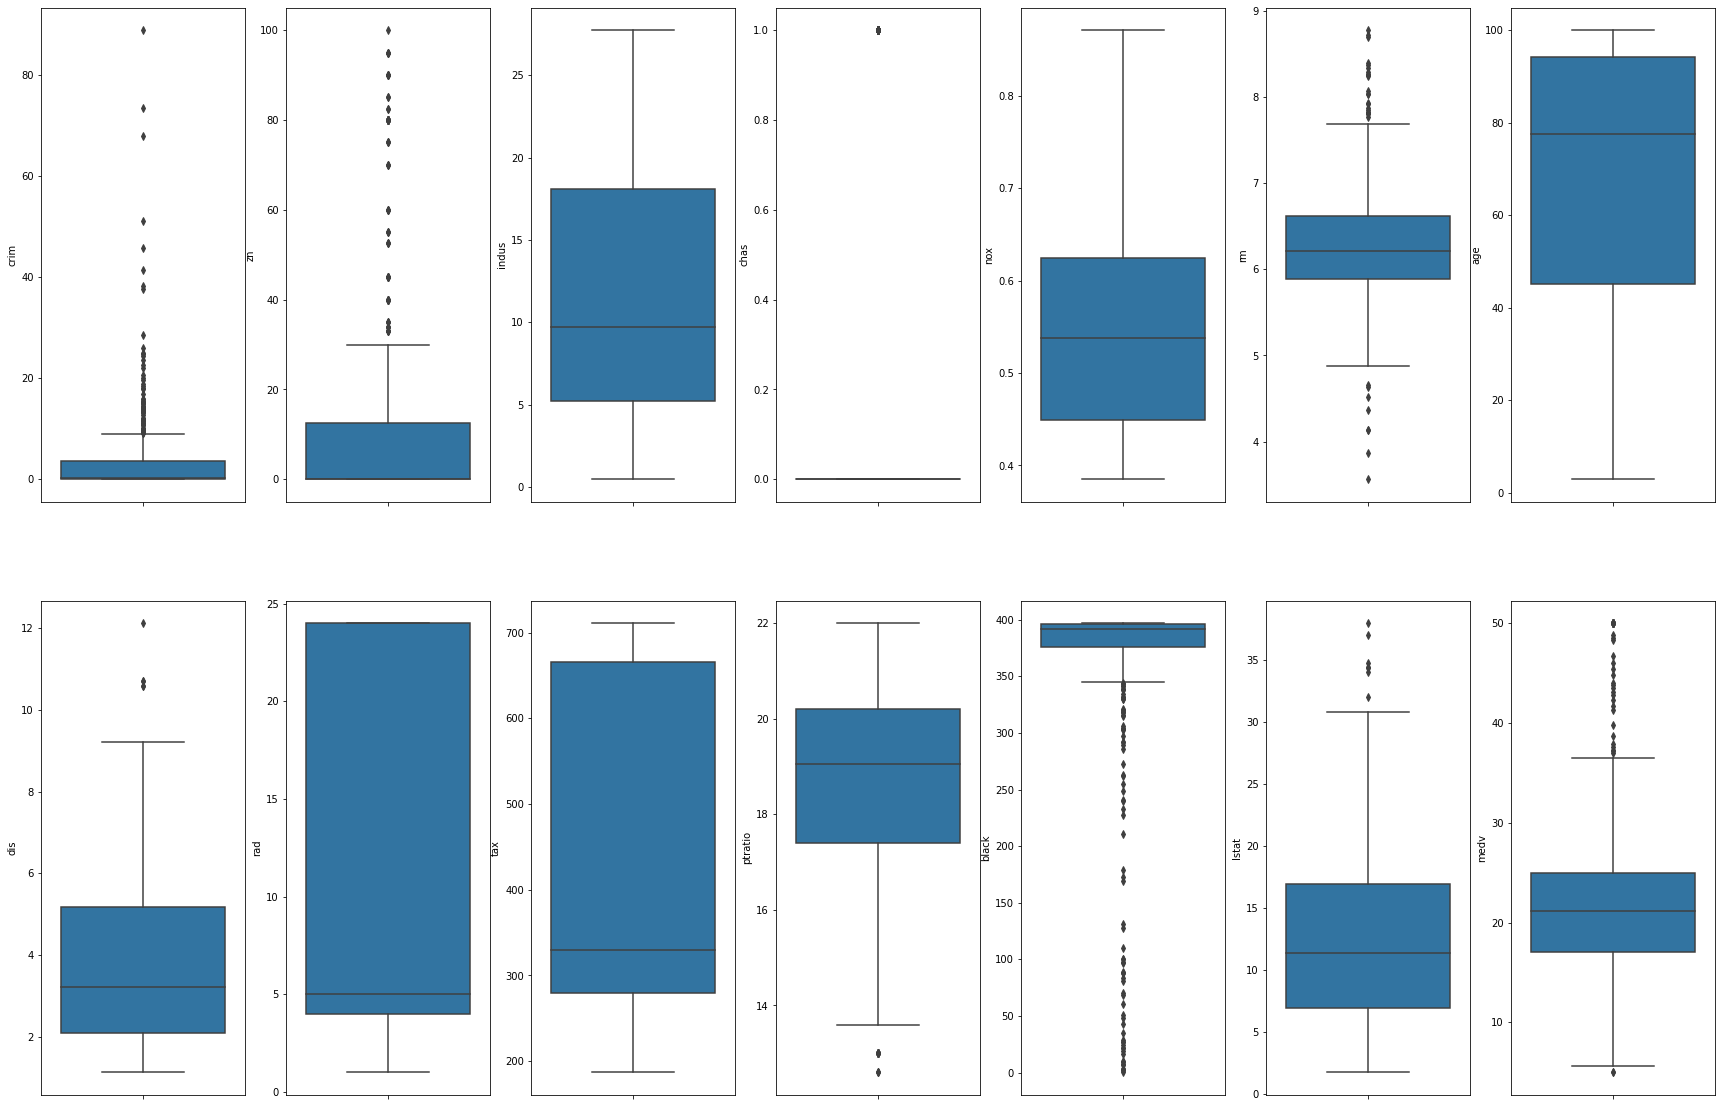

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(30, 20))
index = 0
axs = axs.flatten()
for k, v in data.items():
  sns.boxplot(y=k, data=data, ax=axs[index])
  index += 1

crim, zn, rm, black has outliers

In [23]:
for k, v in data.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  irq = q3 - q1
  v_col = v[(v <= q1 - 1.5*irq) | (v >= q3 + 1.5*irq)]
  perc = np.shape(v_col)[0] * 100 / np.shape(data)[0]
  print("outlier for {} is equal to = {:.2f}%".format(k, perc))

outlier for crim is equal to = 13.04%
outlier for zn is equal to = 13.44%
outlier for indus is equal to = 0.00%
outlier for chas is equal to = 100.00%
outlier for nox is equal to = 0.00%
outlier for rm is equal to = 5.93%
outlier for age is equal to = 0.00%
outlier for dis is equal to = 0.99%
outlier for rad is equal to = 0.00%
outlier for tax is equal to = 0.00%
outlier for ptratio is equal to = 2.96%
outlier for black is equal to = 15.22%
outlier for lstat is equal to = 1.38%
outlier for medv is equal to = 7.91%


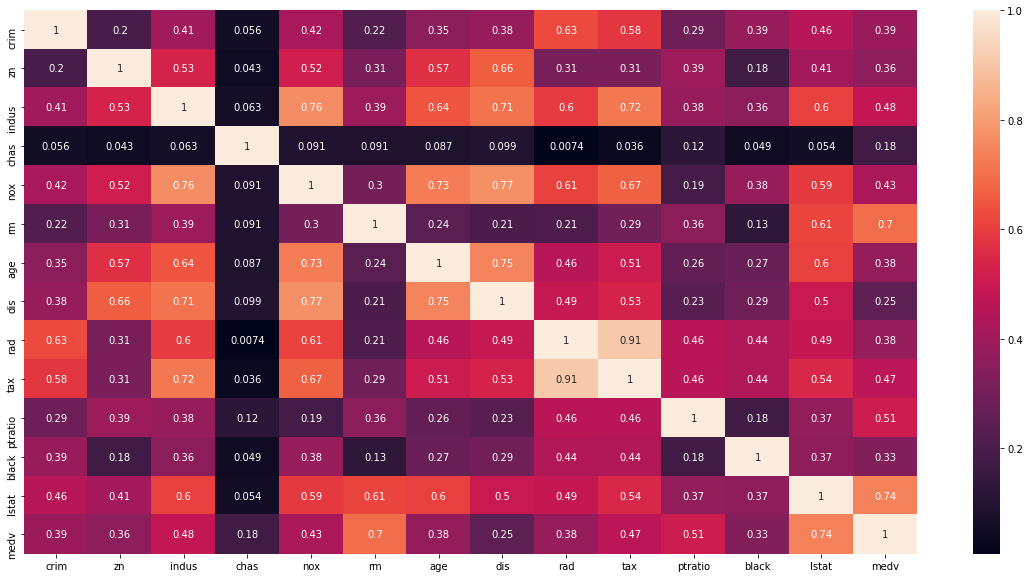

In [24]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr().abs(), annot=True)

In this stage we seperate features that has correlation value more than 0.5 with medv

In [25]:
data.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [26]:
from sklearn.model_selection import train_test_split
valid_columns = ['rm', 'ptratio', 'lstat', 'medv']
data = data.loc[:, valid_columns]
train, test = train_test_split(data, test_size=0.2)
y_train = train["medv"]
x_train = train.drop("medv", axis=1)
y_test = test["medv"]
x_test = test.drop("medv", axis=1)

In [27]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)
y_predict = lr.predict(x_test)


In [28]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_predict)
reg_results.append([mse, "linear_regression"])
print(mse)

15.992343126990008


In [29]:
# y_test = np.array(y_test)
# for i in range(len(y_test)):
#   print(y_test[i], y_predict[i])
# print(np.array(y_test))
# print(y_predict)

رگرسیون خطی بر اساس مجموع مربعات خطا برای داده های آموزش ضرایب را برآورد می کند سپس با استفاده از ضرایبی که بدست آورده است برای داده های تست مجموع مربعات خطا که یک تابع ارزیابی برای جواب مسئله است مسئله را ارزیابی می کند.

# Logistic Regression for Diabets

In [30]:
data = pd.read_csv("diabetes.csv")
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [31]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


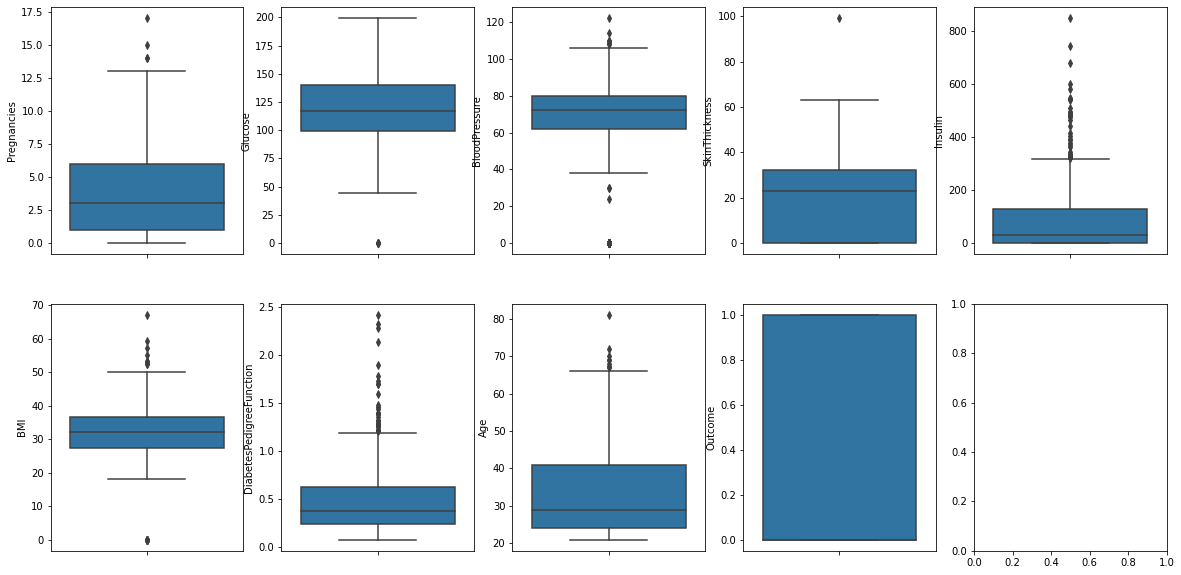

In [32]:
import seaborn as sns
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
axs = axs.flatten()
index = 0
for k, v in data.items():
  sns.boxplot(y=k, data=data, ax=axs[index])
  index += 1

In [33]:
for k, v in data.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  irq = q3 - q1
  v_col = v[(v <= (q1 - irq * 1.5)) | (v >= (q3 + 1.5 * irq))]
  perc = np.shape(v_col)[0] * 100 / np.shape(v)[0]
  print("outlier percentage for {} is equal to {:.2f}%".format(k, perc))

outlier percentage for Pregnancies is equal to 0.52%
outlier percentage for Glucose is equal to 0.65%
outlier percentage for BloodPressure is equal to 5.86%
outlier percentage for SkinThickness is equal to 0.13%
outlier percentage for Insulin is equal to 4.43%
outlier percentage for BMI is equal to 2.47%
outlier percentage for DiabetesPedigreeFunction is equal to 3.78%
outlier percentage for Age is equal to 1.17%
outlier percentage for Outcome is equal to 0.00%


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

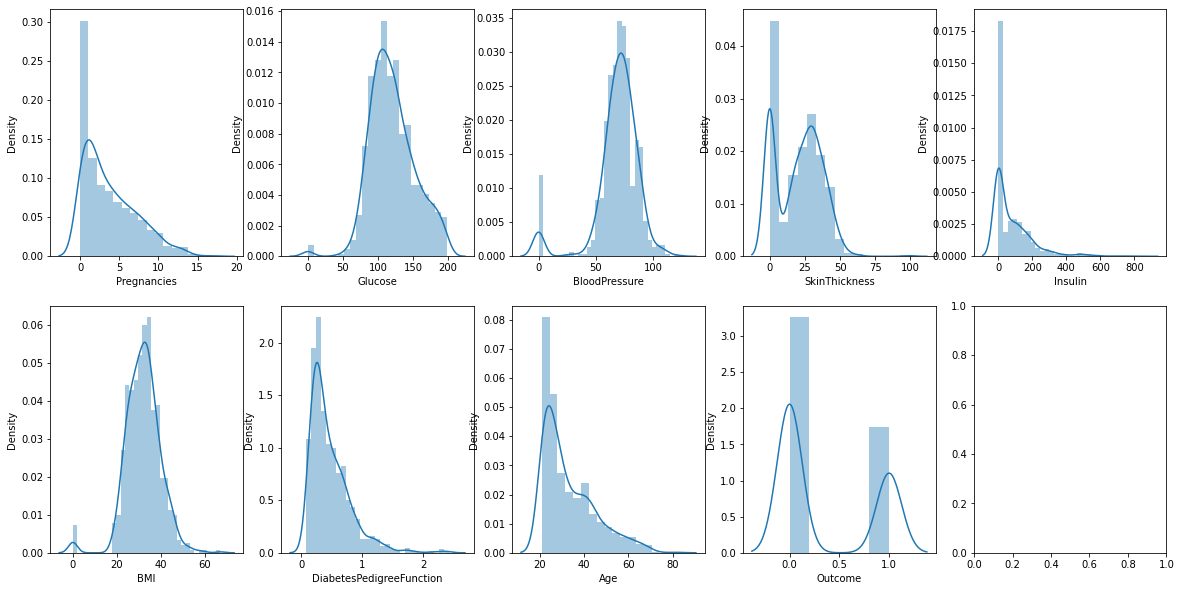

In [34]:
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
axs = axs.flatten()
index = 0
for k, v in data.items():
  sns.distplot(v, ax=axs[index])
  index += 1
  

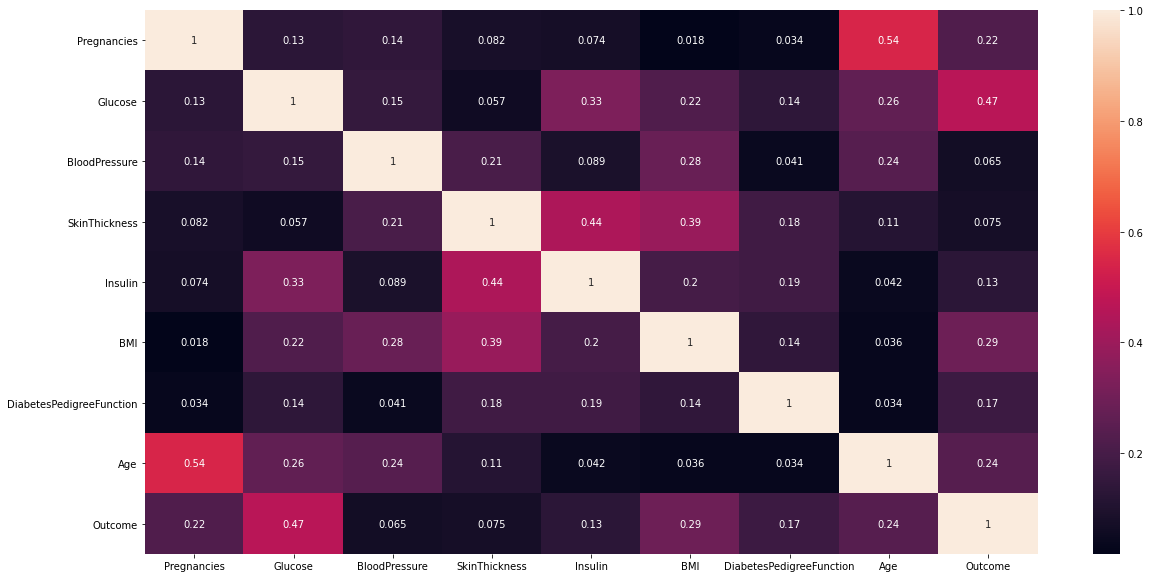

In [35]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr().abs(), annot=True)

In [36]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [37]:
valid_features = ['Pregnancies', 'Glucose', "BMI", "Age", "Outcome"]
data = data.loc[:, valid_features]
train, test = train_test_split(data, test_size=0.2)
y_train = train["Outcome"]
x_train = train.drop("Outcome", axis=1)
y_test = test["Outcome"]
x_test = test.drop("Outcome", axis=1)

In [38]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)
y_predict = lr.predict(x_test)

In [39]:
acc = accuracy_score(y_test, y_predict)
clf_results.append([acc, "logistic regression"])
print(acc)

0.8051948051948052


در لاجیستیک رگرسیون که برای کلاسیفای کردن داده ها به کار میرود باید بازه پیش بینی خود را بین صفر و یک ببریم و یک ترشولد قرار بدهیم در حالی که در رگرسیون ما با مسائلی از نوع پیش بینی سر و کار داشتیم

# KNN regressor algorithm for prediction

KNN for prediction price of boston's houses

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

boston_data = pd.read_csv("Boston.csv")
# valid_columns = ['rm', 'ptratio', 'lstat', 'medv']
# boston_data = boston_data.loc[:, valid_columns]
X_train, X_test, Y_train, Y_test = house_preprocessing_data(boston_data)
lr = KNeighborsRegressor()
lr.fit(X_train, Y_train)
y_pred = lr.predict(X_test)
mse = mean_squared_error(Y_test, y_pred)
reg_results.append([mse, "KNN"])
print(mse)

13.75719607843137


# KNN for classification diabets disease

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

diabets_data = pd.read_csv("diabetes.csv")
valid_features = ['Pregnancies', 'Glucose', "BMI", "Age", "Outcome"]
diabets_data = diabets_data.loc[:, valid_features]
X_train, X_test, Y_train, Y_test = diabets_preprocessing_data(diabets_data)
clf = KNeighborsClassifier()
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, y_pred)
clf_results.append([acc, "KNN"])
print(acc)

0.7402597402597403


از این الگوریتم برای داده های بسیار بزرگ استفاده نمی شود چون باید فاصله هر داده تست را با بقیه داده ها بگیرد فاصله داده ها را در خود نگه دارد و کلی اتفاقات زمانگیر دیگر به همین خاطر اگر برای داده های بزرگ این کار را انجام بدهیم در آن صورت پیچیدگی زمانی ما بسیار زیاد می شود.

# SVM to predict house price

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

house_data = read_data("Boston.csv")
X_train, X_test, Y_train, Y_test = house_preprocessing_data(house_data)
svr = SVR(C=1.0, epsilon=0.2)
svr.fit(X_train, Y_train)
y_pred = svr.predict(X_test)
mse = mean_squared_error(Y_test, y_pred)
reg_results.append([mse, "SVM"])
print(mse)

24.60655176571232


# SVM to predict diabets

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

diabets_data = read_data("diabetes.csv")
X_train, X_test, Y_train, Y_test = diabets_preprocessing_data(diabets_data)
clf = SVC(gamma="auto")
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, y_pred)
clf_results.append([acc, "SVM"])
print(acc)

0.7467532467532467


این الگوریتم را با نام کلاس بندی بر اساس بزرگترین مارجین هم می شناسند 

# Decision Tree regressor for house

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

house_data = read_data("Boston.csv")
house_data = clean_boston_data(house_data)
X_train, X_test, Y_train, Y_test = house_preprocessing_data(house_data)
dtr = DecisionTreeRegressor(random_state=0)
dtr.fit(X_train, Y_train)
y_pred = dtr.predict(X_test)
mse = mean_squared_error(Y_test, y_pred)
reg_results.append([mse, "Decision Tree"])
print(mse)

26.36568627450981


# Decision Tree classifier for *diabets*

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier 

diabets_data = read_data("diabetes.csv")
X_train, X_test, Y_train, Y_test = diabets_preprocessing_data(diabets_data)
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, y_pred)
clf_results.append([acc, "Decision Tree"])
print(acc)

0.6753246753246753


# KMEAN algorithm for clustering

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

house_data = read_data("Boston.csv")
X_train, X_test, Y_train, Y_test = house_preprocessing_data(house_data)
clr = KMeans(n_clusters=5, random_state=0)
clr.fit(X_train)
clr.predict(X_test, Y_test)

array([3, 4, 0, 2, 2, 3, 3, 0, 3, 3, 4, 3, 0, 3, 2, 2, 0, 3, 3, 3, 4, 0,
       3, 3, 0, 2, 2, 2, 1, 3, 3, 4, 3, 4, 2, 0, 0, 2, 3, 0, 2, 0, 0, 4,
       4, 3, 3, 3, 0, 0, 3, 3, 4, 0, 3, 4, 3, 3, 3, 2, 2, 2, 3, 0, 0, 2,
       2, 3, 4, 0, 3, 4, 2, 3, 1, 3, 1, 3, 3, 0, 0, 4, 2, 1, 4, 2, 4, 3,
       3, 4, 0, 4, 4, 2, 3, 3, 3, 4, 3, 0, 3, 3], dtype=int32)

# Ensemble learning

Boston house price regression

In [48]:
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor, ExtraTreesRegressor, RandomForestRegressor, VotingRegressor

house_data = read_data("Boston.csv")
house_data = clean_boston_data(house_data)

X_train, X_test, Y_train, Y_test = house_preprocessing_data(house_data)

model1 = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=30, random_state=0, loss='ls').fit(X_train, Y_train)
mse1 = mean_squared_error(Y_test, model1.predict(X_test))
reg_results.append([mse1, "GradientBoosting"])

model2 = BaggingRegressor().fit(X_train, Y_train)
mse2 = mean_squared_error(Y_test, model2.predict(X_test))
reg_results.append([mse2, "Bagging"])

model3 = ExtraTreesRegressor().fit(X_train, Y_train)
mse3 = mean_squared_error(Y_test, model3.predict(X_test))
reg_results.append([mse3, "Extratree"])

model4 = RandomForestRegressor().fit(X_train, Y_train)
mse4 = mean_squared_error(Y_test, model3.predict(X_test))
reg_results.append([mse4, "RandomForest"])

print(mse1, mse2, mse3, mse4)


12.335676120444683 8.598352941176469 6.801237352941164 6.801237352941164


diabets classification

In [49]:
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, StackingClassifier, VotingClassifier

diabetes_data = read_data("diabetes.csv")

print(diabetes_data.shape)

X_train, X_test, Y_train, Y_test = diabets_preprocessing_data(diabetes_data)

model1 = AdaBoostClassifier().fit(X_train, Y_train)
acc1 = accuracy_score(Y_test, model1.predict(X_test))

model2 = BaggingClassifier().fit(X_train, Y_train)
acc2 = accuracy_score(Y_test, model2.predict(X_test))

# model3 = GradientBoostingClassifier().fit(X_train, Y_train)
# acc3 = accuracy_score(Y_test, model4.predict(X_test))

print(acc1, acc2)

(768, 9)
0.7792207792207793 0.7727272727272727


[[15.992343126990008, 'linear_regression'], [13.75719607843137, 'KNN'], [24.60655176571232, 'SVM'], [26.36568627450981, 'Decision Tree'], [12.335676120444683, 'GradientBoosting'], [8.598352941176469, 'Bagging'], [6.801237352941164, 'Extratree'], [6.801237352941164, 'RandomForest']]


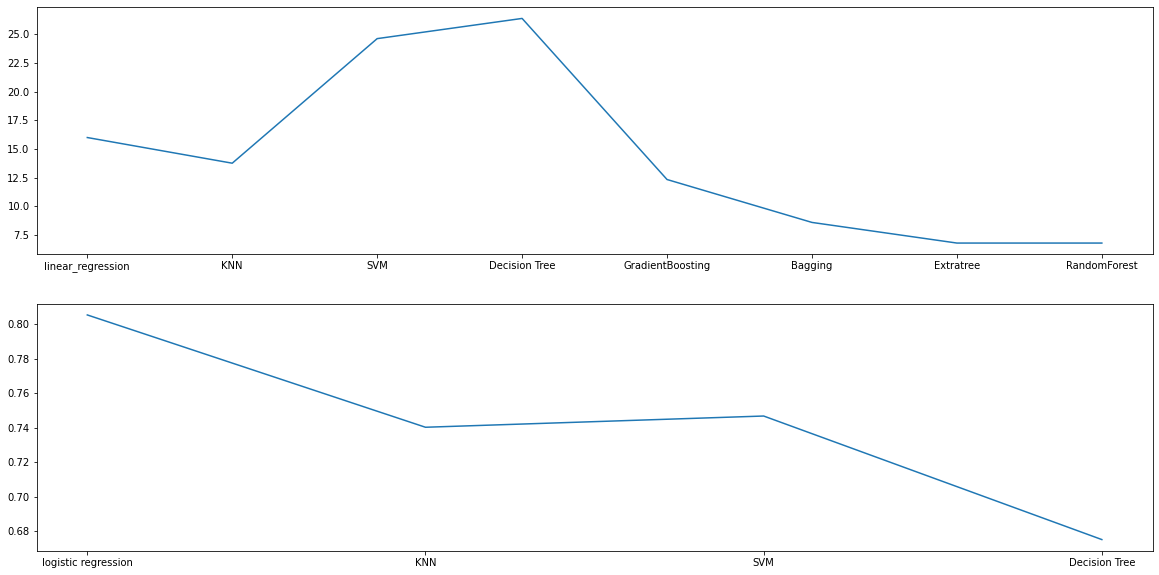

In [50]:
fix, axs = plt.subplots(nrows=2, ncols=1, figsize=(20, 10))
print(reg_results)
sns.lineplot(y=[i[0] for i in reg_results], x=[i[1] for i in reg_results], ax=axs[0])
sns.lineplot(y=[i[0] for i in clf_results], x=[i[1] for i in clf_results], ax=axs[1])